In [11]:
import pandas as pd 
import sqlite3 
con = sqlite3.connect('chinook.db') 
cursor = con.cursor()

sql = "SELECT trackid,tracks.name,albums.Title AS album,media_types.Name AS media,genres.Name AS genres FROM tracks INNER JOIN albums ON Albums.AlbumId = tracks.AlbumId INNER JOIN media_types ON media_types.MediaTypeId = tracks.MediaTypeId INNER JOIN genres ON genres.GenreId = tracks.GenreId;"  
try:
    cursor.execute(sql)
    con.commit()
    print("Entry successfully retrieved.")
except Exception as e:
    print("Exception occurred.",e)

result = cursor.fetchall()
df = pd.DataFrame(result, columns=[ 
'Track_ID','Track_Name','Album_Titles','Media_Type','Genres'
  ])
df


Entry successfully retrieved.


,Track_ID,Track_Name,Album_Titles,Media_Type,Genres
0,1,For Those About To Rock (We Salute You),For Those About To Rock We Salute You,MPEG audio file,Rock
1,2,Balls to the Wall,Balls to the Wall,Protected AAC audio file,Rock
2,3,Fast As a Shark,Restless and Wild,Protected AAC audio file,Rock
3,4,Restless and Wild,Restless and Wild,Protected AAC audio file,Rock
4,5,Princess of the Dawn,Restless and Wild,Protected AAC audio file,Rock
...,...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,Respighi:Pines of Rome,Protected AAC audio file,Classical
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",Schubert: The Late String Quartets & String Qu...,Protected AAC audio file,Classical
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",Monteverdi: L'Orfeo,Protected AAC audio file,Classical
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",Mozart: Chamber Music,Protected AAC audio file,Classical


In [12]:
df.to_sql('com',con,if_exists='replace',index=False)
con.close()
df

,Track_ID,Track_Name,Album_Titles,Media_Type,Genres
0,1,For Those About To Rock (We Salute You),For Those About To Rock We Salute You,MPEG audio file,Rock
1,2,Balls to the Wall,Balls to the Wall,Protected AAC audio file,Rock
2,3,Fast As a Shark,Restless and Wild,Protected AAC audio file,Rock
3,4,Restless and Wild,Restless and Wild,Protected AAC audio file,Rock
4,5,Princess of the Dawn,Restless and Wild,Protected AAC audio file,Rock
...,...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,Respighi:Pines of Rome,Protected AAC audio file,Classical
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",Schubert: The Late String Quartets & String Qu...,Protected AAC audio file,Classical
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",Monteverdi: L'Orfeo,Protected AAC audio file,Classical
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",Mozart: Chamber Music,Protected AAC audio file,Classical


In [13]:
import pandas as pd
import sqlite3
con = sqlite3.connect('chinook.db')
sql = "SELECT * FROM com"
df = pd.read_sql_query(sql,con)
con.close()
df

,Track_ID,Track_Name,Album_Titles,Media_Type,Genres
0,1,For Those About To Rock (We Salute You),For Those About To Rock We Salute You,MPEG audio file,Rock
1,2,Balls to the Wall,Balls to the Wall,Protected AAC audio file,Rock
2,3,Fast As a Shark,Restless and Wild,Protected AAC audio file,Rock
3,4,Restless and Wild,Restless and Wild,Protected AAC audio file,Rock
4,5,Princess of the Dawn,Restless and Wild,Protected AAC audio file,Rock
...,...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,Respighi:Pines of Rome,Protected AAC audio file,Classical
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",Schubert: The Late String Quartets & String Qu...,Protected AAC audio file,Classical
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",Monteverdi: L'Orfeo,Protected AAC audio file,Classical
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",Mozart: Chamber Music,Protected AAC audio file,Classical


In [19]:
con = sqlite3.connect('chinook.db') 
cursor = con.cursor()
sql = "SELECT Genres,COUNT(*) as count FROM com GROUP BY Genres ORDER BY count DESC ;"   
try:
    cursor.execute(sql)
    con.commit()
    print("Entry successfully retrieved.")
except Exception as e:
    print("Exception occurred.",e)

result = cursor.fetchall()
print(type(result))
print(result)
print(pd.DataFrame(result)) 
print('\n')
con.close()
df = pd.DataFrame(result, columns=[ 
'Genres','Count'
  ])
df

Entry successfully retrieved.
<class 'list'>
[('Rock', 1297), ('Latin', 579), ('Metal', 374), ('Alternative & Punk', 332), ('Jazz', 130), ('TV Shows', 93), ('Blues', 81), ('Classical', 74), ('Drama', 64), ('R&B/Soul', 61), ('Reggae', 58), ('Pop', 48), ('Soundtrack', 43), ('Alternative', 40), ('Hip Hop/Rap', 35), ('Electronica/Dance', 30), ('World', 28), ('Heavy Metal', 28), ('Sci Fi & Fantasy', 26), ('Easy Listening', 24), ('Comedy', 17), ('Bossa Nova', 15), ('Science Fiction', 13), ('Rock And Roll', 12), ('Opera', 1)]
                     0     1
0                 Rock  1297
1                Latin   579
2                Metal   374
3   Alternative & Punk   332
4                 Jazz   130
5             TV Shows    93
6                Blues    81
7            Classical    74
8                Drama    64
9             R&B/Soul    61
10              Reggae    58
11                 Pop    48
12          Soundtrack    43
13         Alternative    40
14         Hip Hop/Rap    35
15   Electr

,Genres,Count
0,Rock,1297
1,Latin,579
2,Metal,374
3,Alternative & Punk,332
4,Jazz,130
5,TV Shows,93
6,Blues,81
7,Classical,74
8,Drama,64
9,R&B/Soul,61


<ipython-input-31-bb6cb5248f38>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


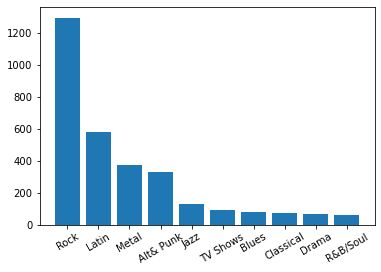

In [31]:
from pandas import Series,DataFrame
from numpy.random import randn
import numpy as np
import matplotlib.pyplot as plt

genres = ["Rock", "Latin", "Metal", "Alt& Punk", "Jazz", "TV Shows","Blues","Classical","Drama","R&B/Soul"]
count = [1297,579,374,332,130,93,81,74,64,61]
plt.bar(range(len(genres)),count)

ax = plt.subplot()
ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
ax.set_xticklabels(genres, rotation=30)

plt.show()